# Titanic Kaggle Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
# reading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
display(train_data.head(), train_data.shape, test_data.head(), test_data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [3]:
# copying data to another variable
df_train = train_data.copy()
df_test = test_data.copy()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**observations**
- There are 5 object dtype columns and 5 int64 dtype columns and 2 float64 dtype columns
- 'Age', 'Cabin' and 'Embarked' columns are the only ones with null values

In [5]:
# checking number of unique values in each columns
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**observations**
- Both 'PassengerID' and 'Name' have 891 unique values, that means these columns have no classification power, so we can drop them

In [6]:
# dropping useless rows
df_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# checking for duplicated rows
df_train.duplicated().sum()

15

In [10]:
# dropping duplicated rows
df_train.drop_duplicates(inplace=True)
df_train.duplicated().sum()

0

## Exploratory Data Analysis (EDA)
### Univariate Analysis

In [12]:
# separating numerical and categorical columns
df_train_num = df_train.select_dtypes(include=['float64', 'int64'])
df_train_cat = df_train.select_dtypes(include=['object'])
print('numerical columns:',df_train_num.columns.tolist())
print('categorical columns:', df_train_cat.columns.tolist())

numerical columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns: ['Sex', 'Ticket', 'Cabin', 'Embarked']


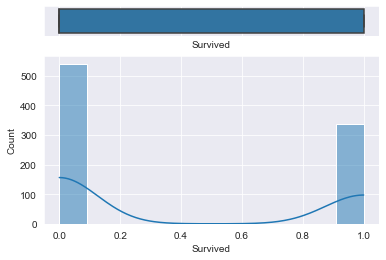

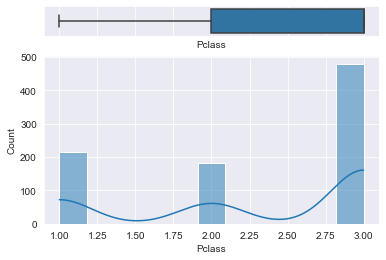

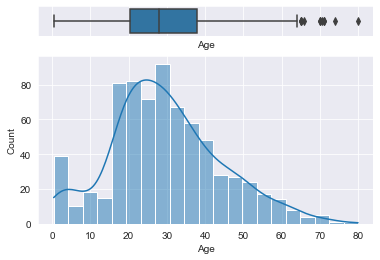

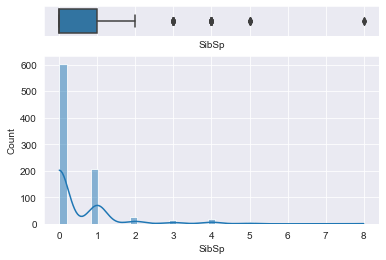

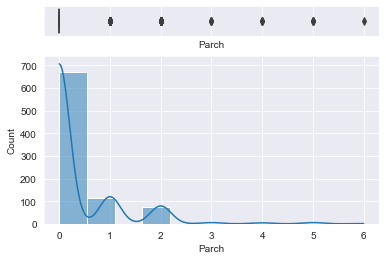

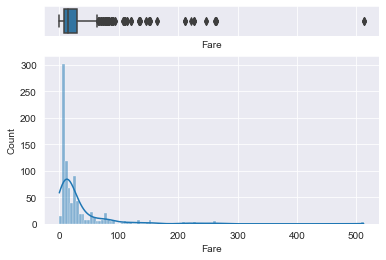

In [13]:
# numerical columns analysis
for i in df_train_num.columns:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
    sns.boxplot(x=i, data=df_train, ax=ax_box)
    sns.histplot(x=i, data=df_train, ax=ax_hist, kde=True)
    plt.show()

**observations**
- More passengers survived than died
- Most passengers are in Pclass 3
- The 'age' column is close to a normal distribution, but has a few outliers (will deal with them later)
- 'Fare', 'Parch' and 'SibSp' are very right skewed

male      569
female    307
Name: Sex, dtype: int64


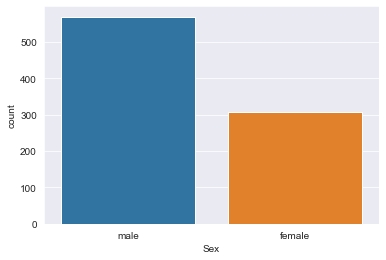

--------------------------------------------------
347082      7
3101295     6
347088      6
CA 2144     6
382652      5
           ..
2693        1
PC 17612    1
349233      1
349236      1
370376      1
Name: Ticket, Length: 681, dtype: int64


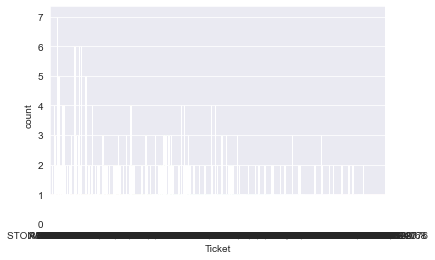

--------------------------------------------------
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


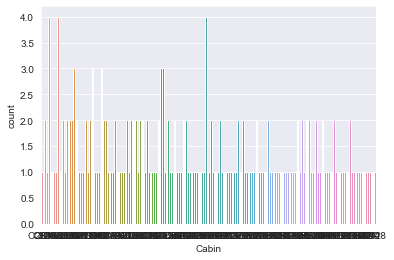

--------------------------------------------------
S    633
C    165
Q     76
Name: Embarked, dtype: int64


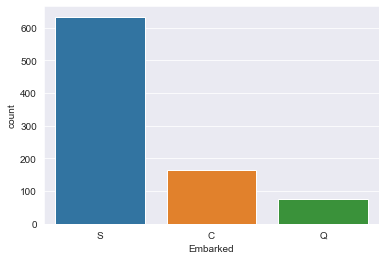

--------------------------------------------------


In [15]:
# Categorical variables analysis
for i in df_train_cat.columns:
    print(df_train[i].value_counts())
    sns.countplot(x=i, data=df_train)
    plt.show()
    print('-'*50)

**observations**
- The visualizations are not very good, but we can see that:
    - Most passengers embarked on S
    - Most passengers were male

### Bivariate and Multivariate analysis

column: Embarked


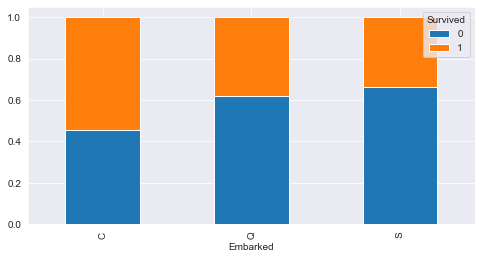

column: Sex


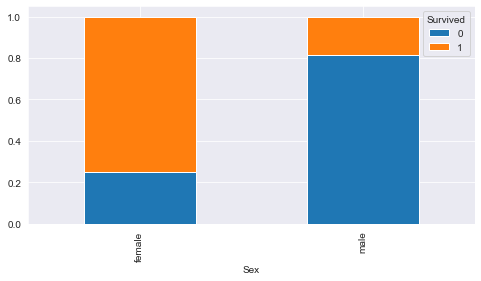

column: Pclass


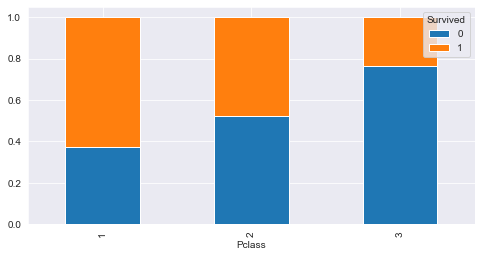

In [20]:
cols = df_train[['Embarked', 'Sex', 'Pclass']]
for i in cols.columns:
    print('column:',i)
    pd.crosstab( df_train[i], df_train.Survived, normalize='index').plot(kind='bar', stacked=True, figsize=(8,4))
    plt.show()

**observations**
- We can see that the percentage of females who survived is much higher than the percentage of male who survived
- Pclass 1 passengers survived in a much higher rate them passengers of other classes
- Passengers who embarked at C had a higher chance of surviving than passengers who embarked at other places

In [21]:
# Survival rate against numberical columns
df_train.groupby(['Survived'])[df_train_num.columns].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,0.0,2.527778,30.626179,0.477778,0.312963,21.748216
1,1.0,1.937500,28.442230,0.470238,0.467262,48.568255


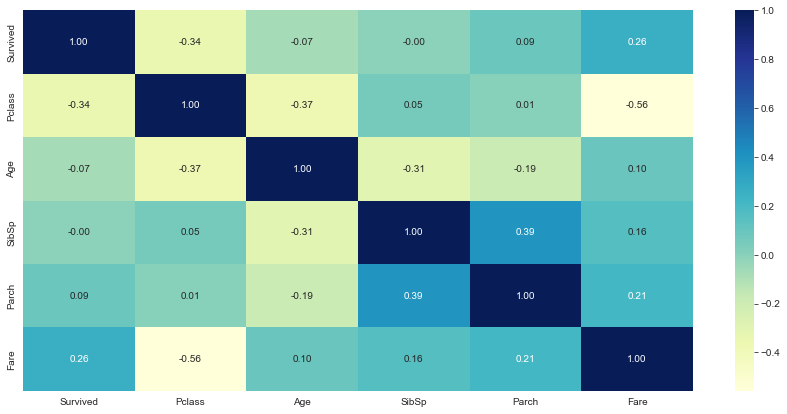

In [22]:
# correlation between numberical columns
plt.figure(figsize=(15,7))
sns.heatmap(df_train_num.corr(), annot=True, fmt='0.2f', cmap='YlGnBu')
plt.show()

## Model building

In [24]:
display(df_train.head(), df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# filling up age null values with the median
df_train.Age.fillna(df_train.Age.median(), inplace=True)
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       673
Embarked      2
dtype: int64

In [32]:
## dropping rows where embarked is null
df_train.dropna(subset=['Embarked'], inplace=True)
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       673
Embarked      0
dtype: int64

In [34]:
# Since most values of Cabin column are nulls, I'11 just drop the columns
df_train.drop(['Cabin'], axis=1,inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [36]:
# making same chages in test dataset
display(df_train.head(), df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df_test.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
